# Issue 9: Add hybridization for select modes using PN class from positive

In [3]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
# The Important Things
from positive import *
from positive.physics import pn
from positive.maths import lim
from matplotlib.pyplot import *
from nrutils import scsearch,gwylm
from nrutils.core.nrsc import gwfcharstart
from positive.physics import mishra
from numpy import *
# Import hybrid class from nrutils 
from nrutils.manipulate.hybridize import make_pnnr_hybrid

(positive)>> Applying custom matplotlib settings.


### Find a simulation

In [125]:
# A = scsearch(keyword='q4a0_T_112_448',apply_remnant_fit=True,verbose=True) # q1.5_50_-50_-0.1_T_96_600
# A = scsearch(keyword='q1.5_50_-50_-0.1_T_96_600',apply_remnant_fit=True,verbose=True) # 
A = scsearch(q=2,keyword='hr-s',verbose=True,nonprecessing=True,apply_remnant_fit=True,institute='gt')
# A = scsearch(keyword='q18a0a08_prad3a_96',verbose=True) # q18a0a0c025_144, q18a0a04c025_96_fine, q18a0aM08c025_96_fine, q18a0a08_prad3a_96

(scsearch)>> Found apply_remnant_fit (=True) keyword.
(scsearch)>> Found institute (=gt) keyword.
(scsearch)>> Found keyword (=hr-s) keyword.
(scsearch)>> Found nonprecessing (=True) keyword.
(scsearch)>> Found q (=2) keyword.
(scsearch)>> Found verbose (=True) keyword.
(scsearch)>> List of keywords or string keyword found: ALL scentry objects matching will be passed. To pass ANY entries matching the keywords, input the keywords using an iterable of not of type list.
(scsearch!)>> Applying remant fit to scentry objects. This should be done if the final mass and spin meta data are not trustworth. The fit being used only works for non-precessing systems.
## Found 21 possibly degenerate simulations:
[0001][bradwr] HR-series: 1chi0.60-2chi0.60-sa-q2.00	(D11_q2.00_a0.6_m160)
[0002][bradwr] HR-series: 1chi0.40-2chi0.40-sa-q2.00	(D11_q2.00_a0.4_m160)
[0003][bradwr] HR-series: 1chi0.20-2chi0.20-sa-q2.00	(D11_q2.00_a0.2_m160)
[0004][bradwr] HR-series: ns-q2.00	(D11_q2.00_a0.0_m200)
[0005][bradw

### Load the waveform data

In [161]:
y = gwylm( A[3], 
          lm=[(2, 1), (2, 2), (3, 2),(3, 3),(4,4),(4,3)], 
          clean=False, dt=0.5, verbose=True )

(gwylm)>> Found dt (=0.5) keyword.
(gwylm)>> Found lm (=[(2, 1), (2, 2), (3, 2), (3, 3), (4, 4), (4, 3)]) keyword.
(gwylm)>> Found scentry_obj (=<nrutils.core.nrsc.scentry instance at 0x10a5c13b0>) keyword.
(gwylm)>> Found verbose (=True) keyword.
(gwylm)>> The (extraction_parameter,level) is (75.0,None), which differs from the config values of (75,0). You have either manually input the non-config values, or the handler has set them by looking at the contents of the simulation directory. 
(__make_lmlist__)>> The following spherical multipoles will be loaded:[(2, 1), (2, 2), (3, 2), (3, 3), (4, 4), (4, 3)]
(load)>> Loading: Ylm_WEYLSCAL4::Psi4r_l2_m1_r75.00.asc
(load)>> Imposing a default padding of 3 to the data.
(pad_wfarr)>> The shape was (3998, 3). Now the shape is (4001, 3).
(load)>> Loading: Ylm_WEYLSCAL4::Psi4r_l2_m2_r75.00.asc
(load)>> Imposing a default padding of 3 to the data.
(pad_wfarr)>> The shape was (3998, 3). Now the shape is (4001, 3).
(load)>> Loading: Ylm_WEYLSCAL4::

### Package development


# -~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~ #
(make_pnnr_hybrid)>> Validating inputs
# -~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~ #

(__validate_inputs__)>> Verbose mode ON.
(__validate_inputs__)>> Valid gwylm object found. Its simulation name is "D11_q2.00_a0.0_m200".
(__validate_inputs__)>> PN w_orb MIN frequency is 0.010000 (i.e. w_orb*M_init)
(__validate_inputs__)>> PN w_orb MAX frequency is 0.064262 (i.e. w_orb*M_init)

# -~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~ #
(make_pnnr_hybrid)>> Generating PN multipoles
# -~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~ #

(pn)>> Now constructing instance of the pn class.
(pn)>> Defining the initial binary state based on inputs.
(__validative_constructor__)>> Rescaling masses so that m1+m2=1
(__calc_orbital_frequency__)>> Calculating evolution of orbital phase using RK4 steps.
(__calc_com_binding_energy__)>> Calculating COM binding energy
(__calc_hlm_of_t__)>> Calculating the (l,m)=(2,2) spherical multip

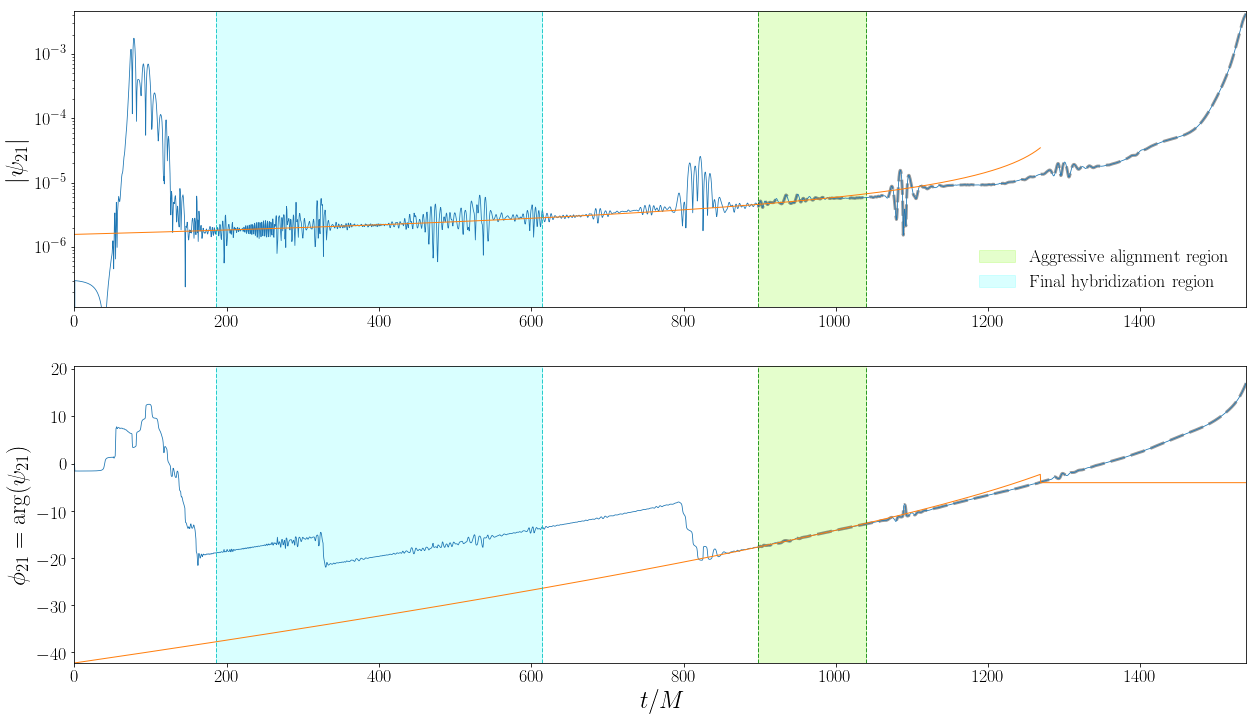

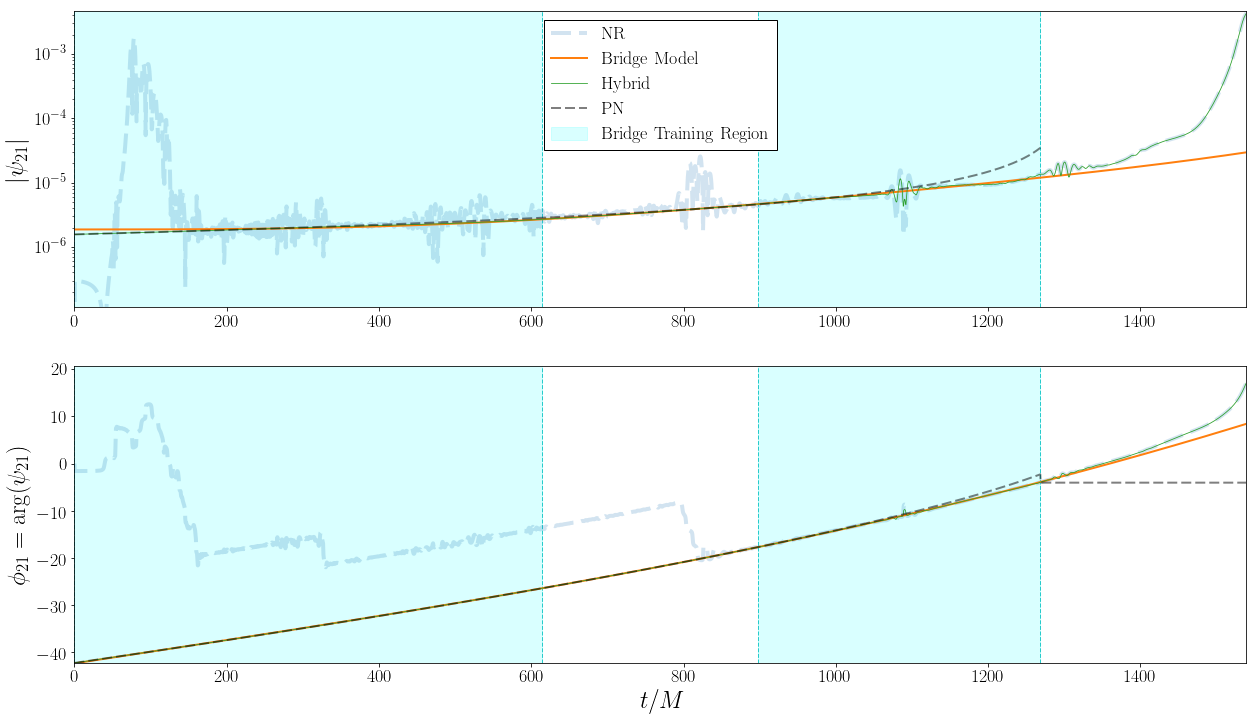

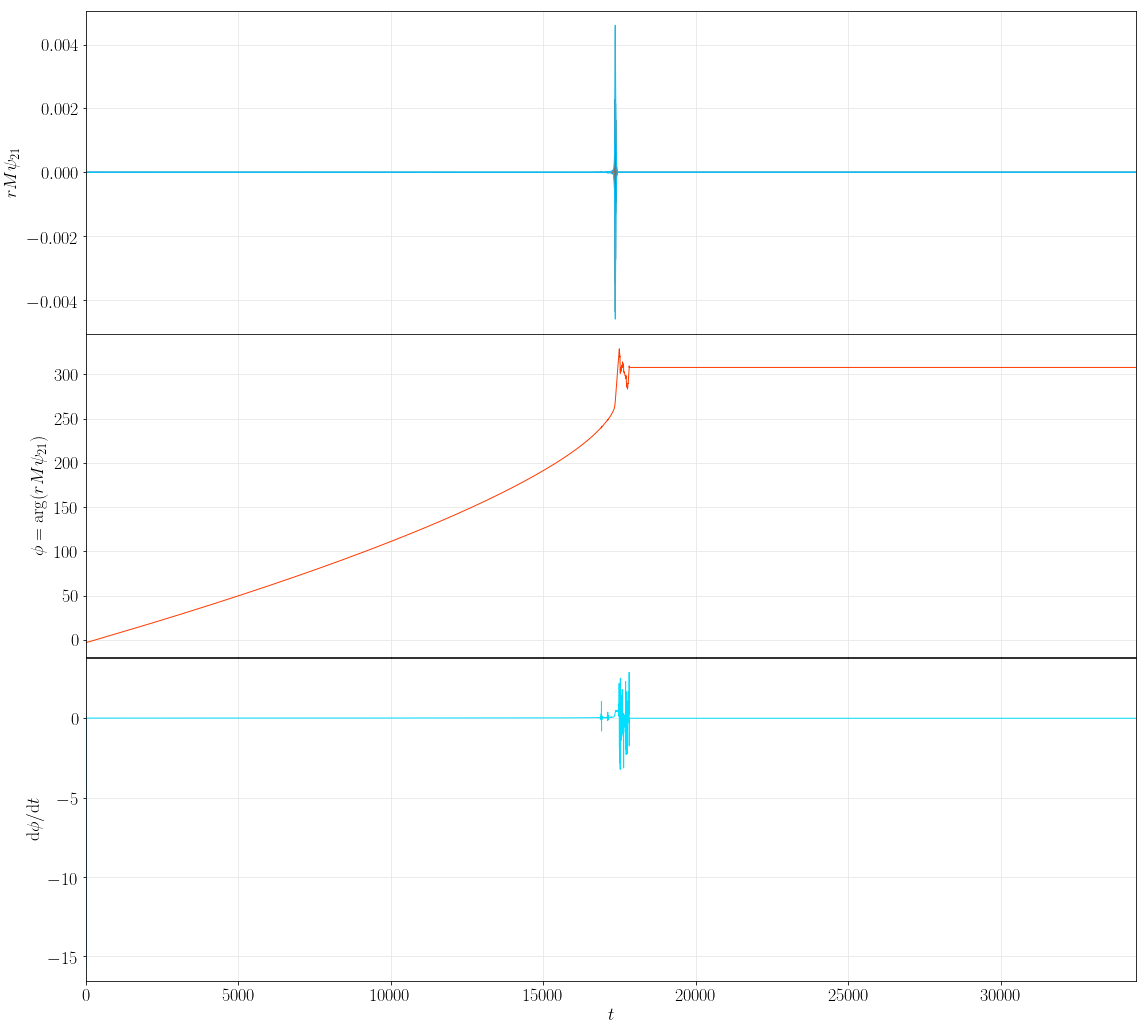

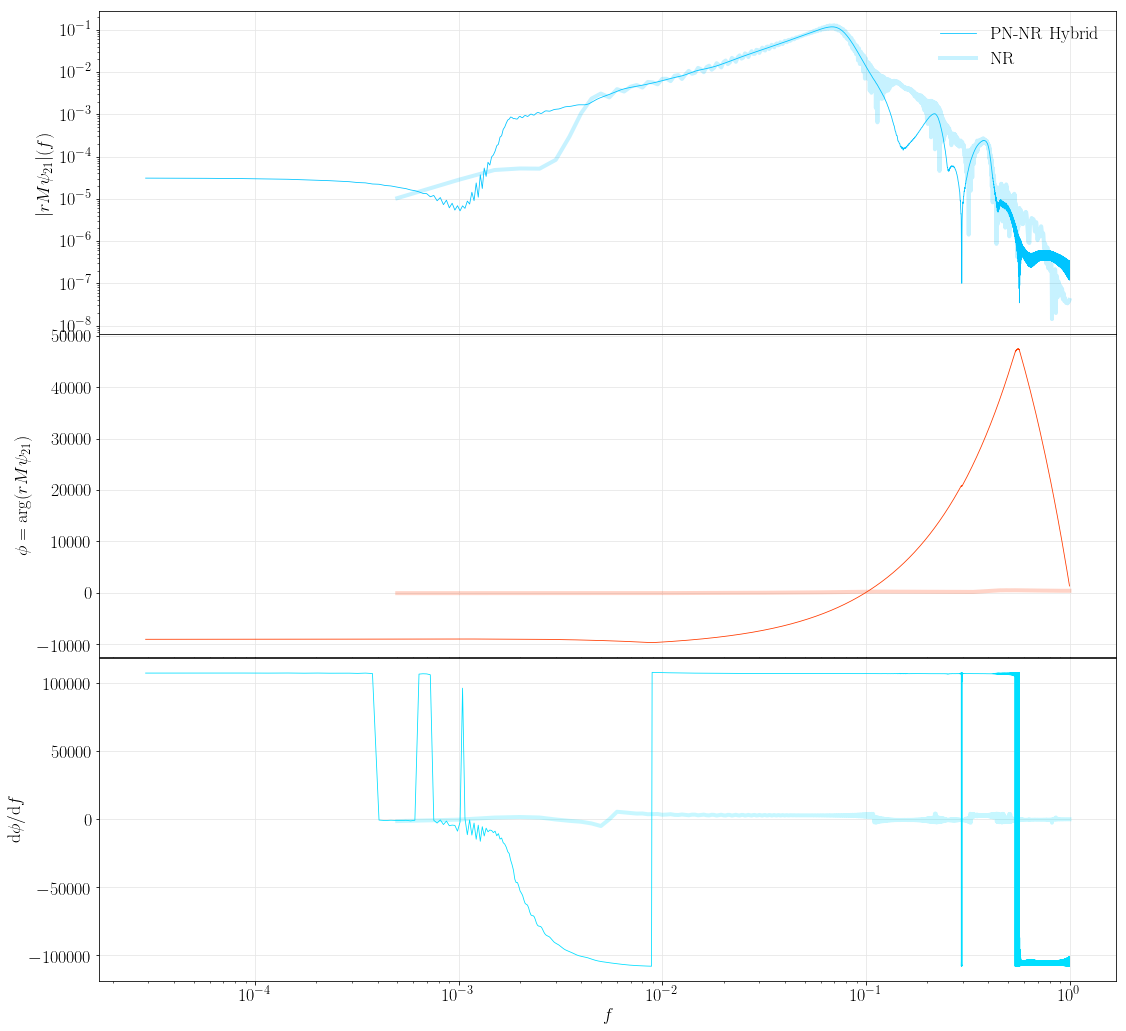


# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ #
(__calc_multipole_hybrids__)>> Creating hybrid for: (2, 2)
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ #

(__get_aligned_nr_pn_amp_phase__!)>> A scale factor of 0.964357 is applied to the PN amplitude.
(__get_aligned_nr_pn_amp_phase__!)>> The PN phase will be shifted by -0.034636 (rad).
(__calc_single_multipole_hybrid__!)>> The NR data appares to be sufficiently smooth. No bridge model will be used.


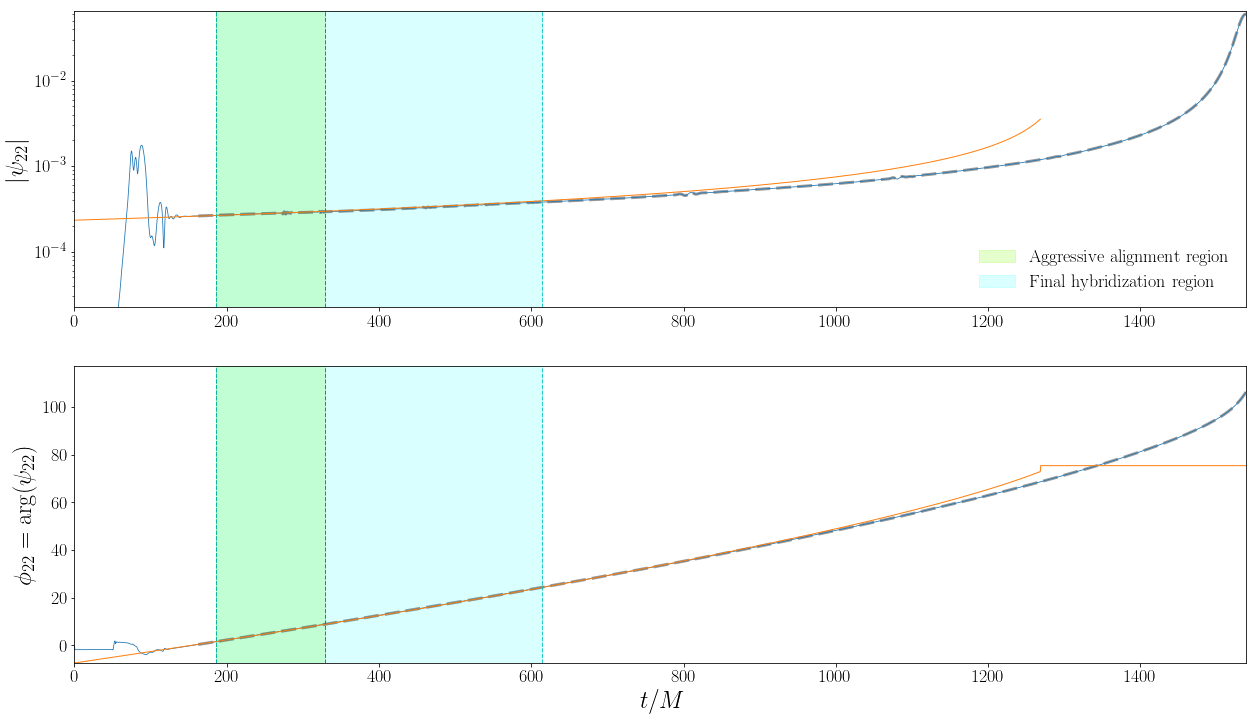

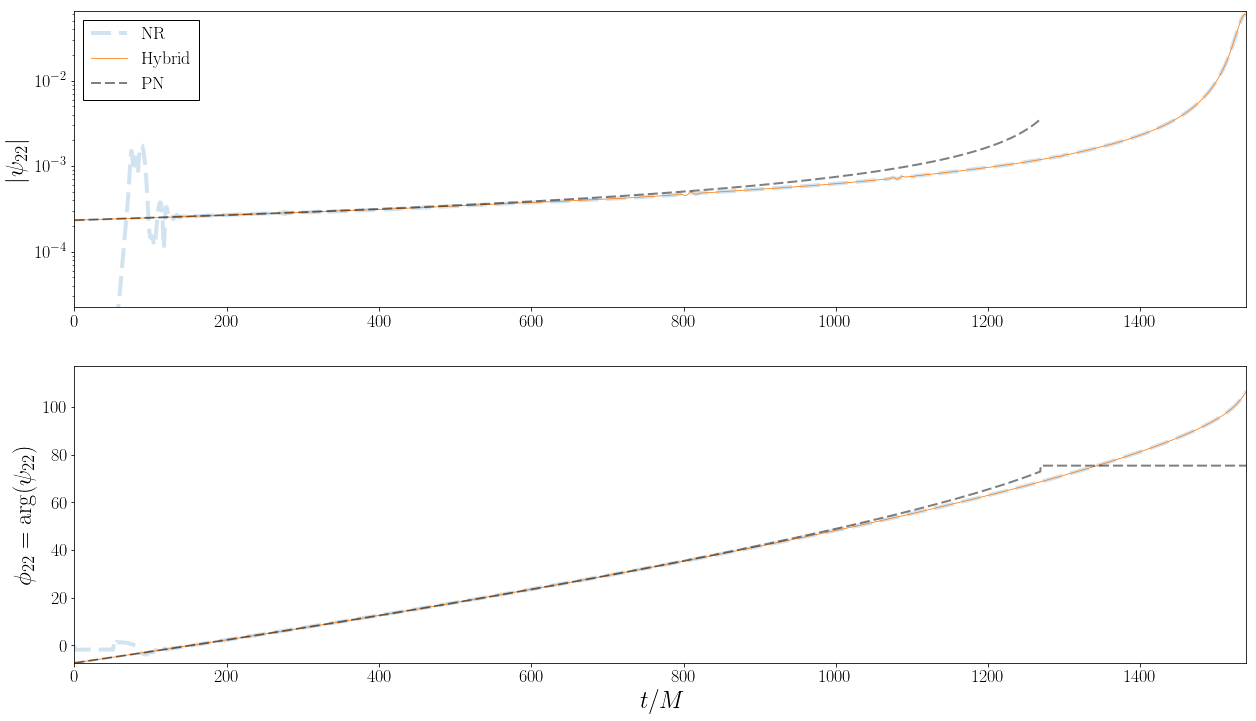

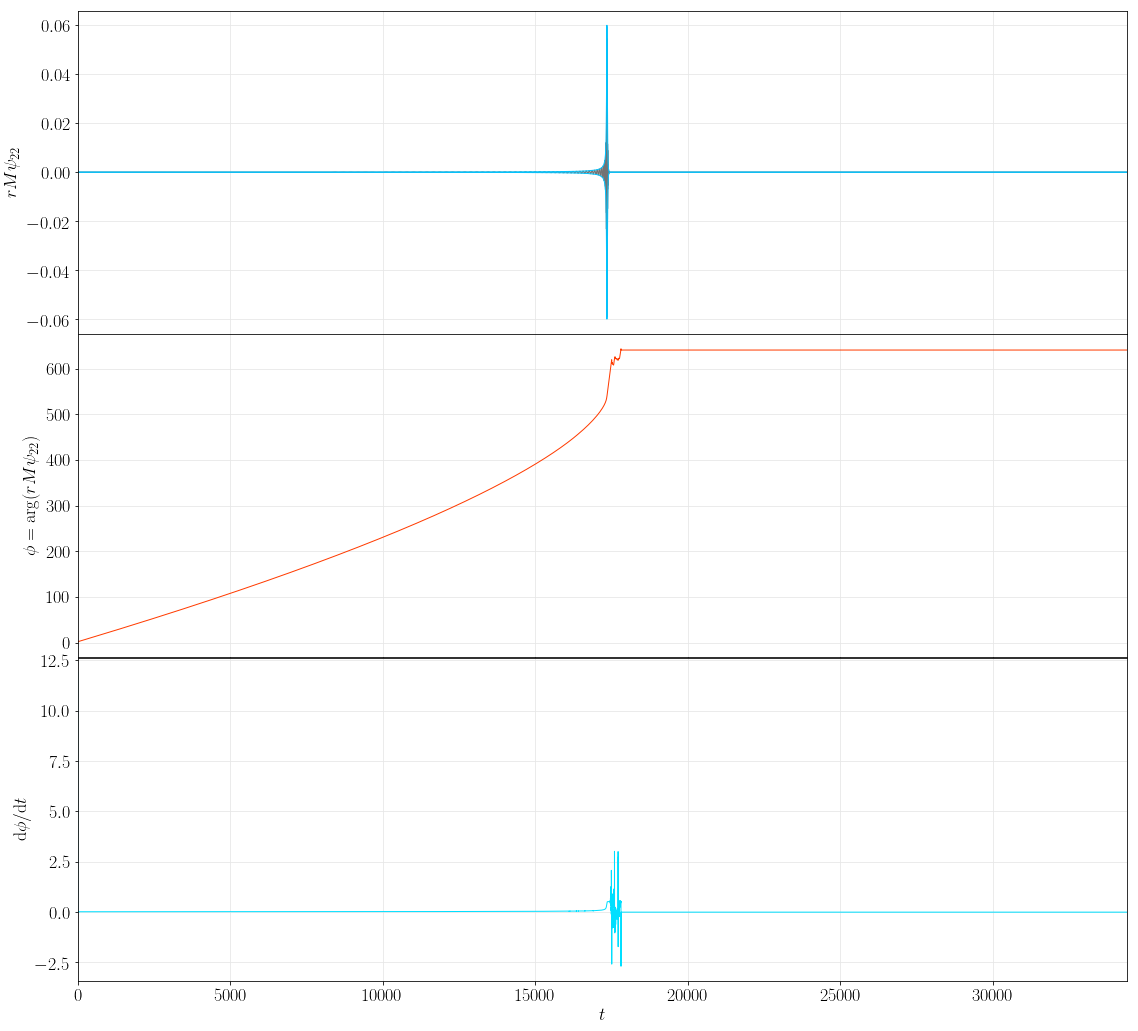

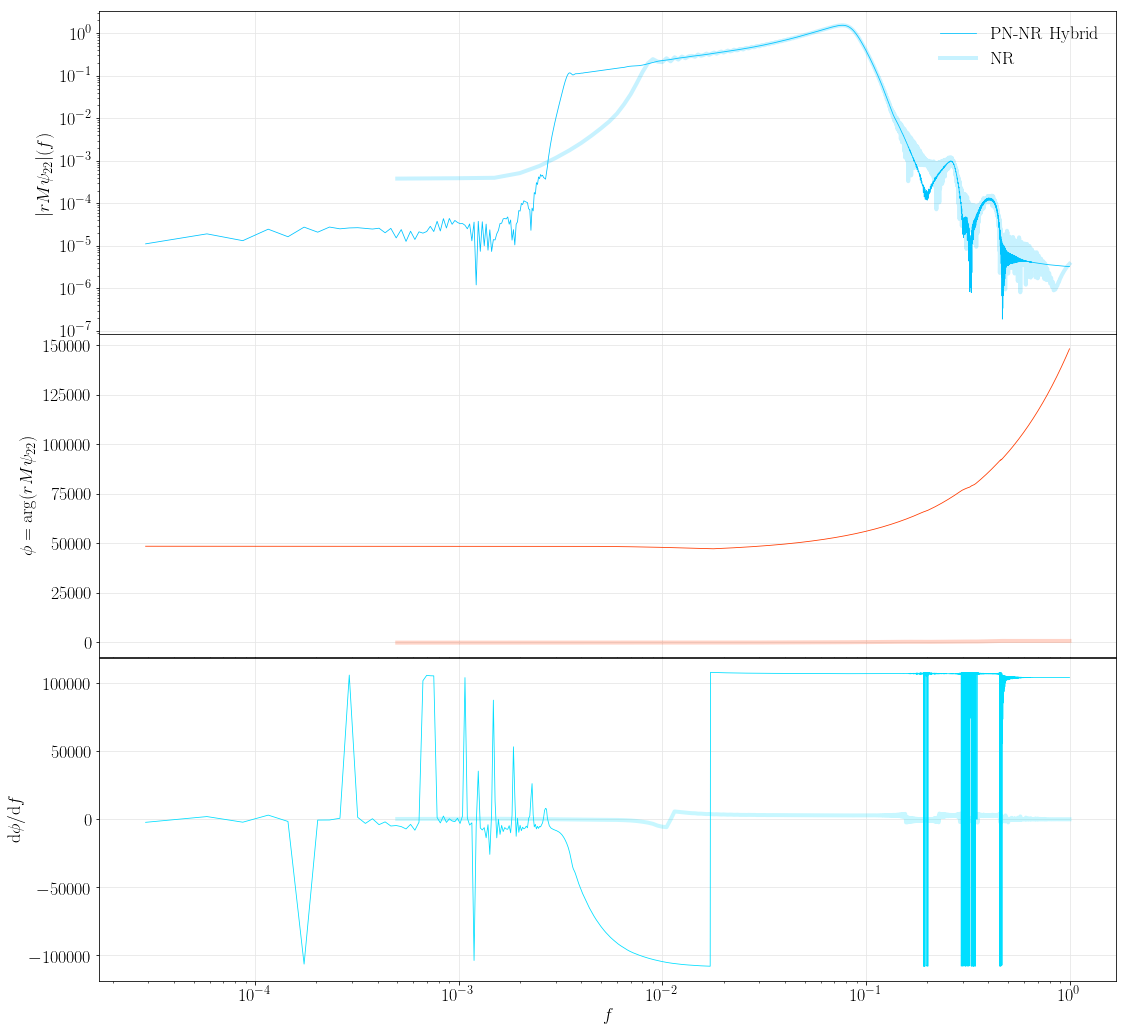


# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ #
(__calc_multipole_hybrids__)>> Creating hybrid for: (3, 2)
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ #

(__get_aligned_nr_pn_amp_phase__!)>> A scale factor of 0.760159 is applied to the PN amplitude.
(__get_aligned_nr_pn_amp_phase__!)>> The PN phase will be shifted by 0.325287 (rad).


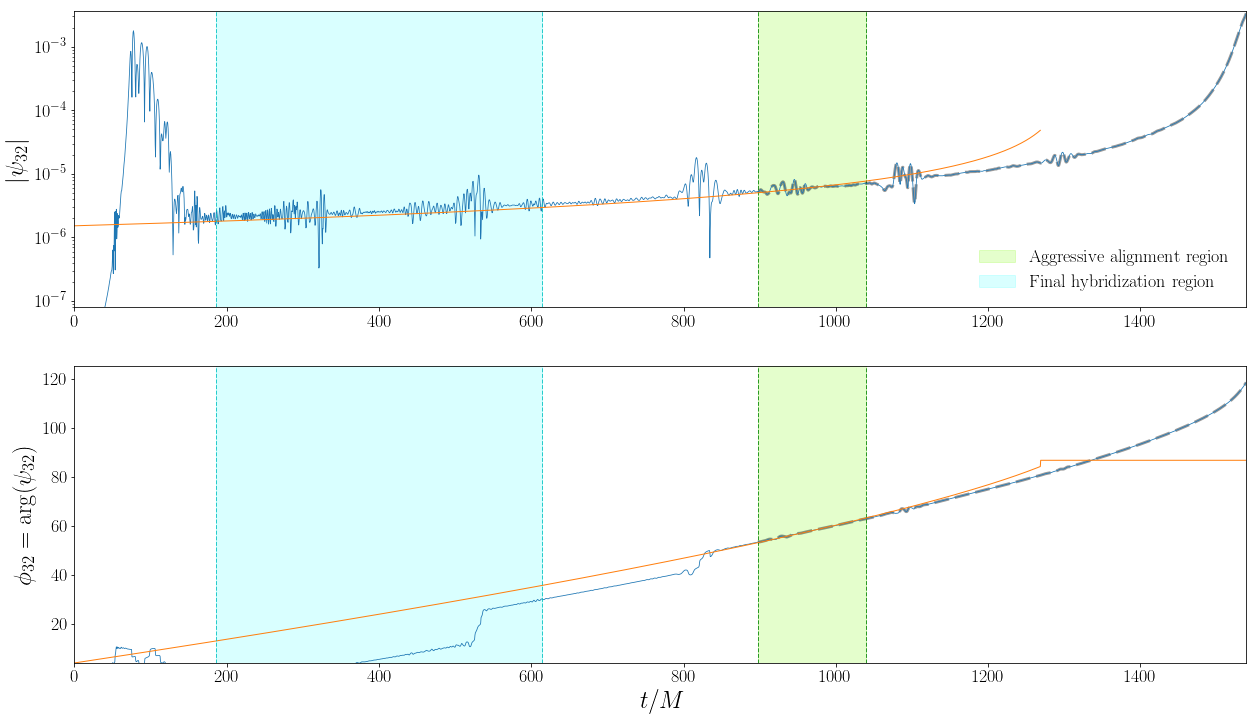

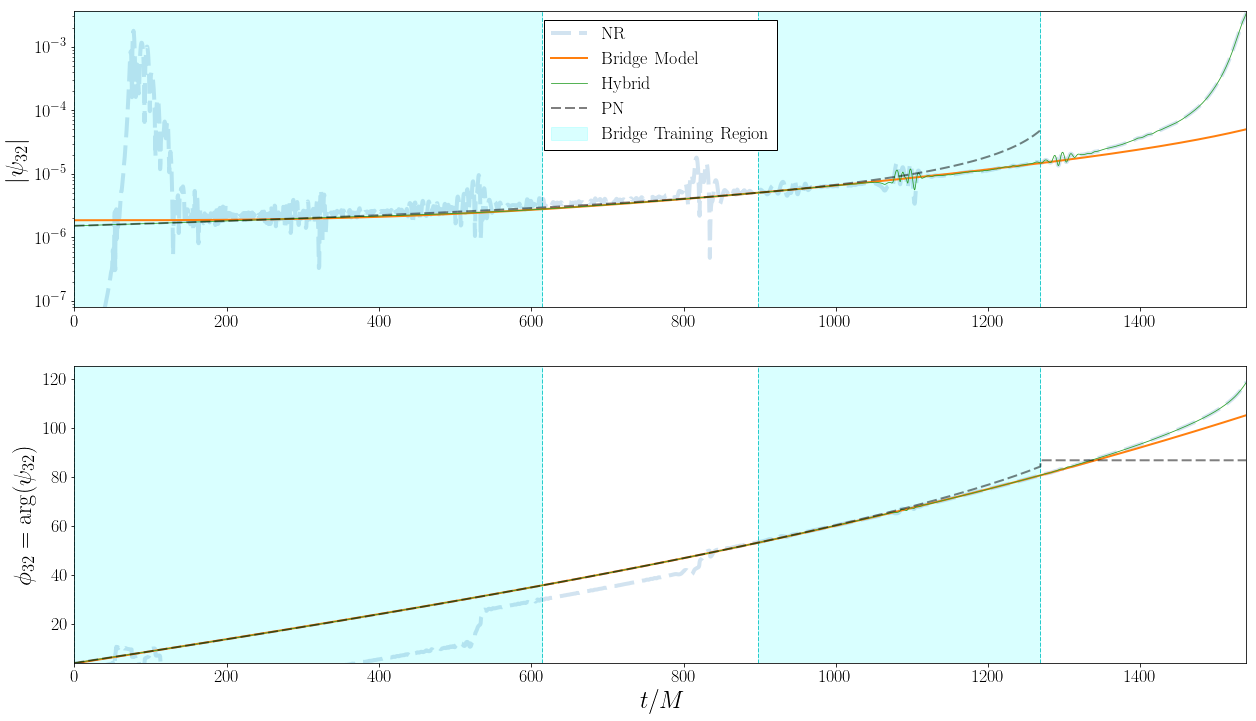

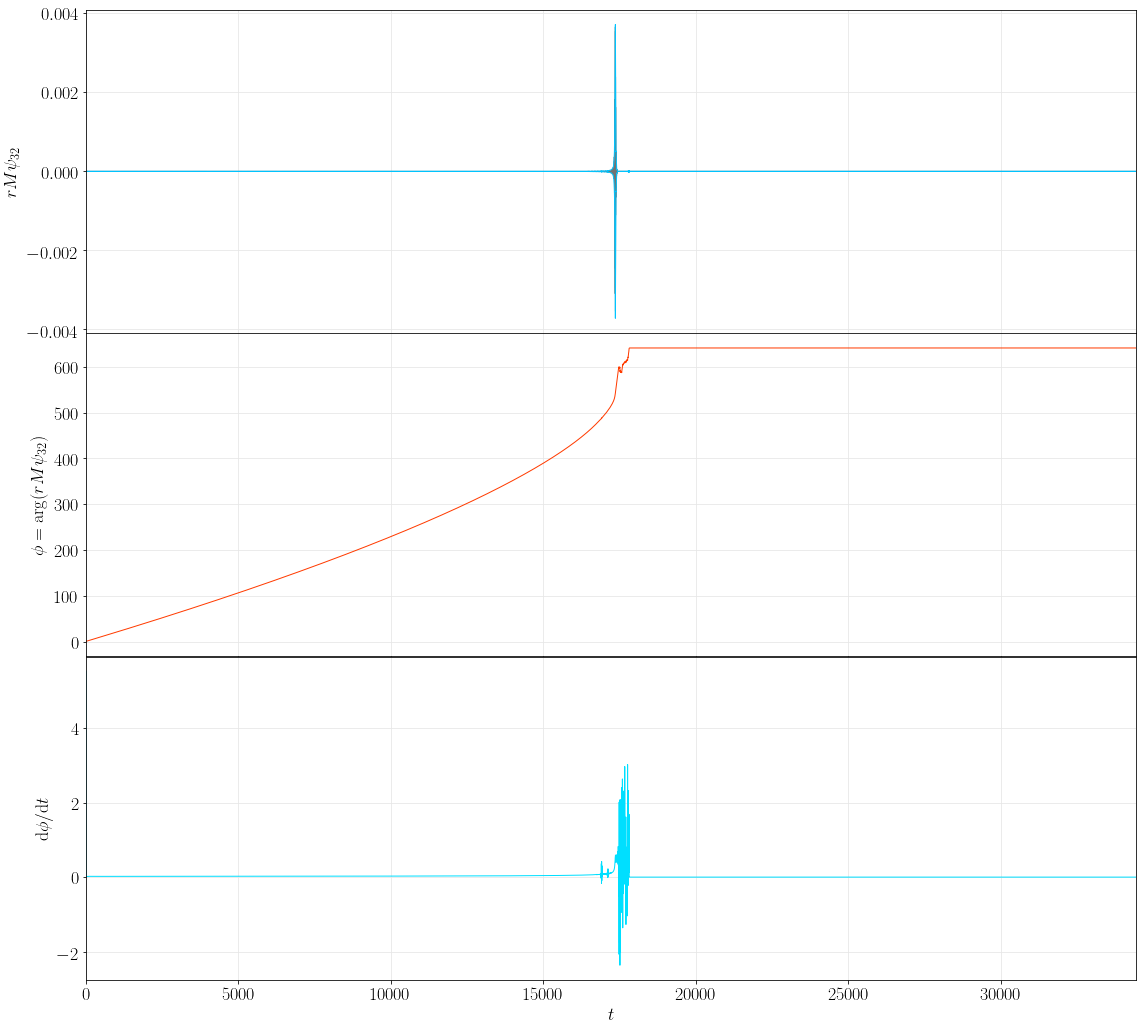

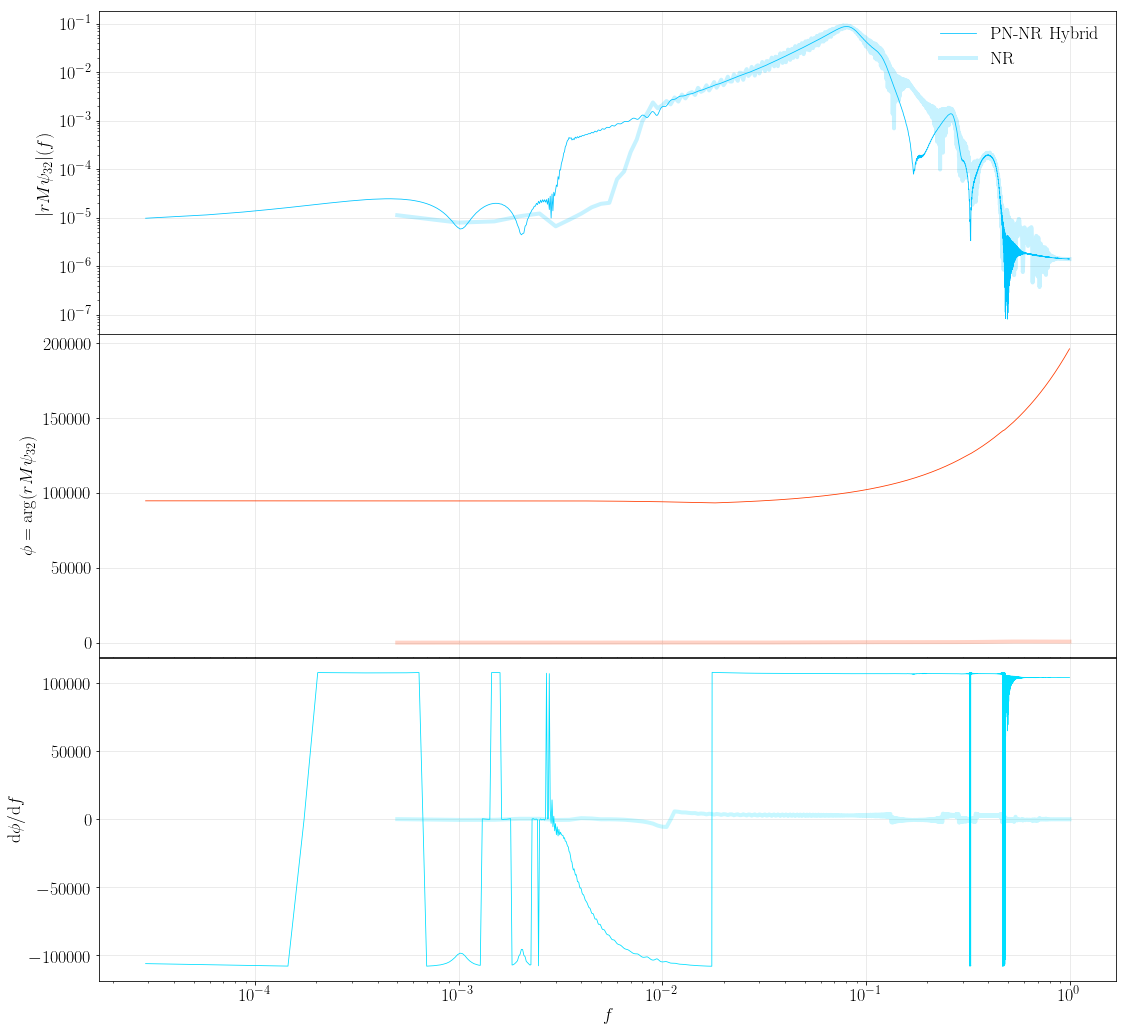


# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ #
(__calc_multipole_hybrids__)>> Creating hybrid for: (3, 3)
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ #

(__get_aligned_nr_pn_amp_phase__!)>> A scale factor of 1.010174 is applied to the PN amplitude.
(__get_aligned_nr_pn_amp_phase__!)>> The PN phase will be shifted by -0.147872 (rad).


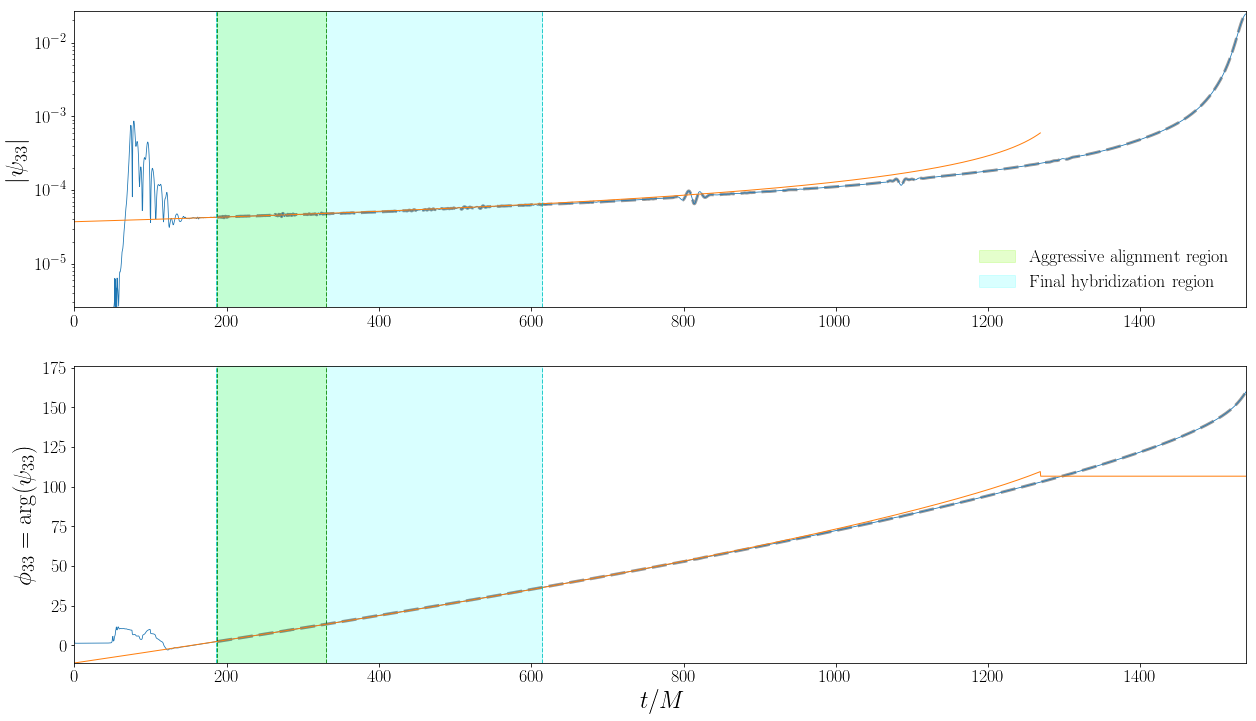

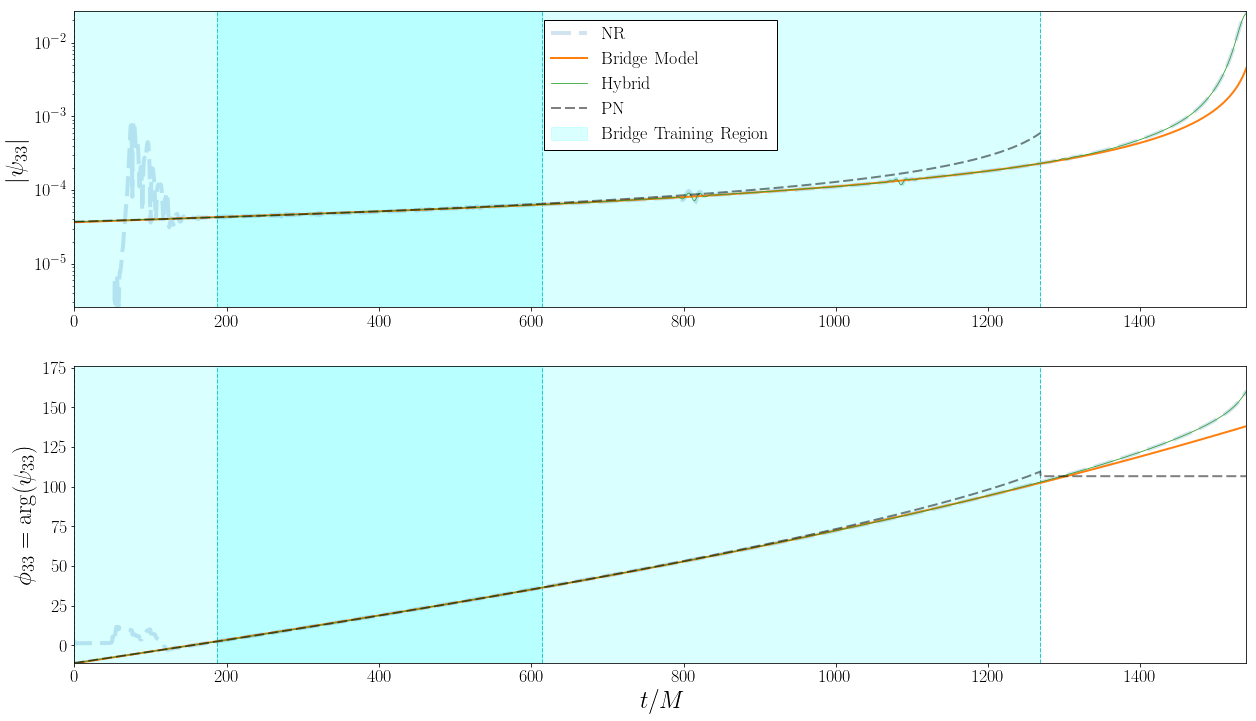

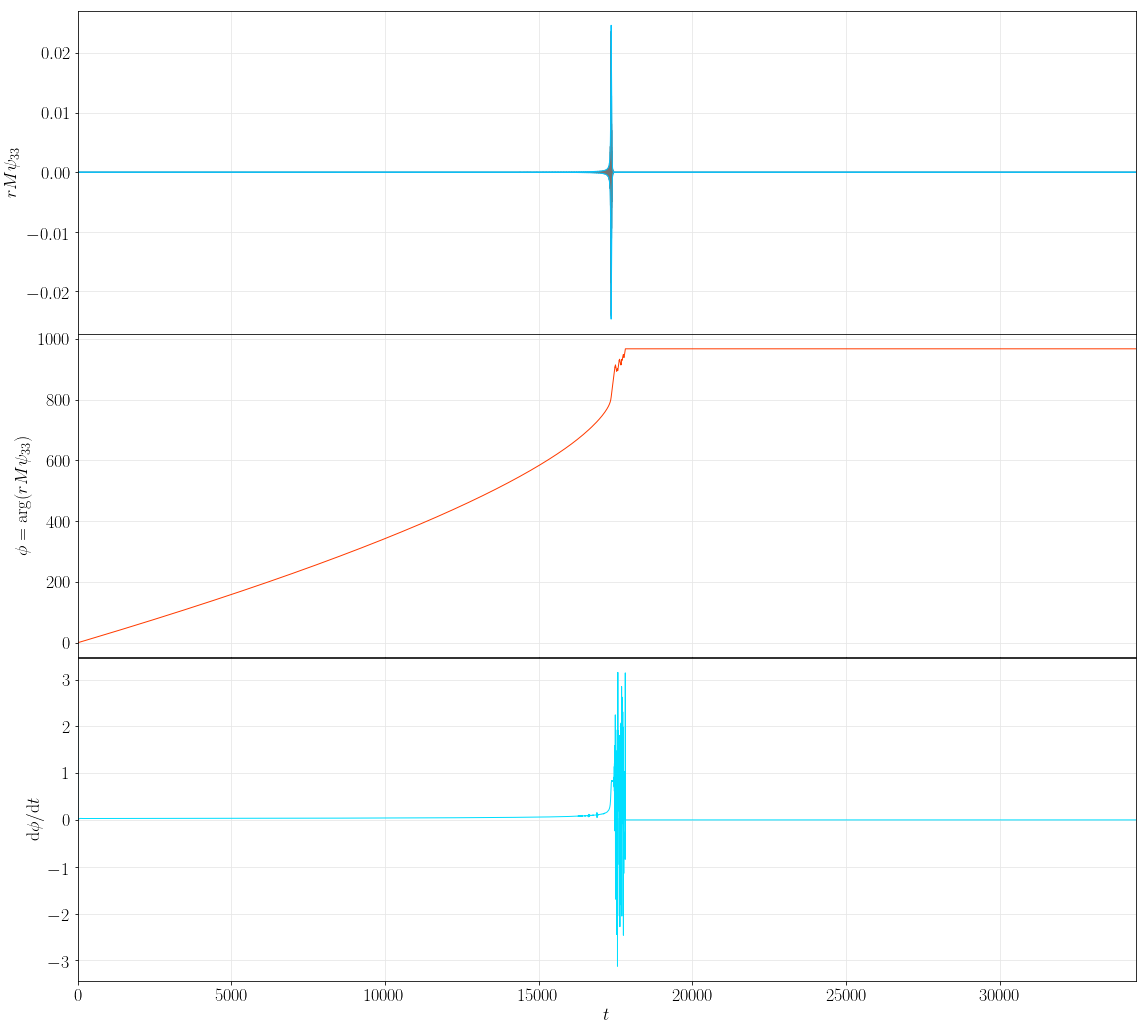

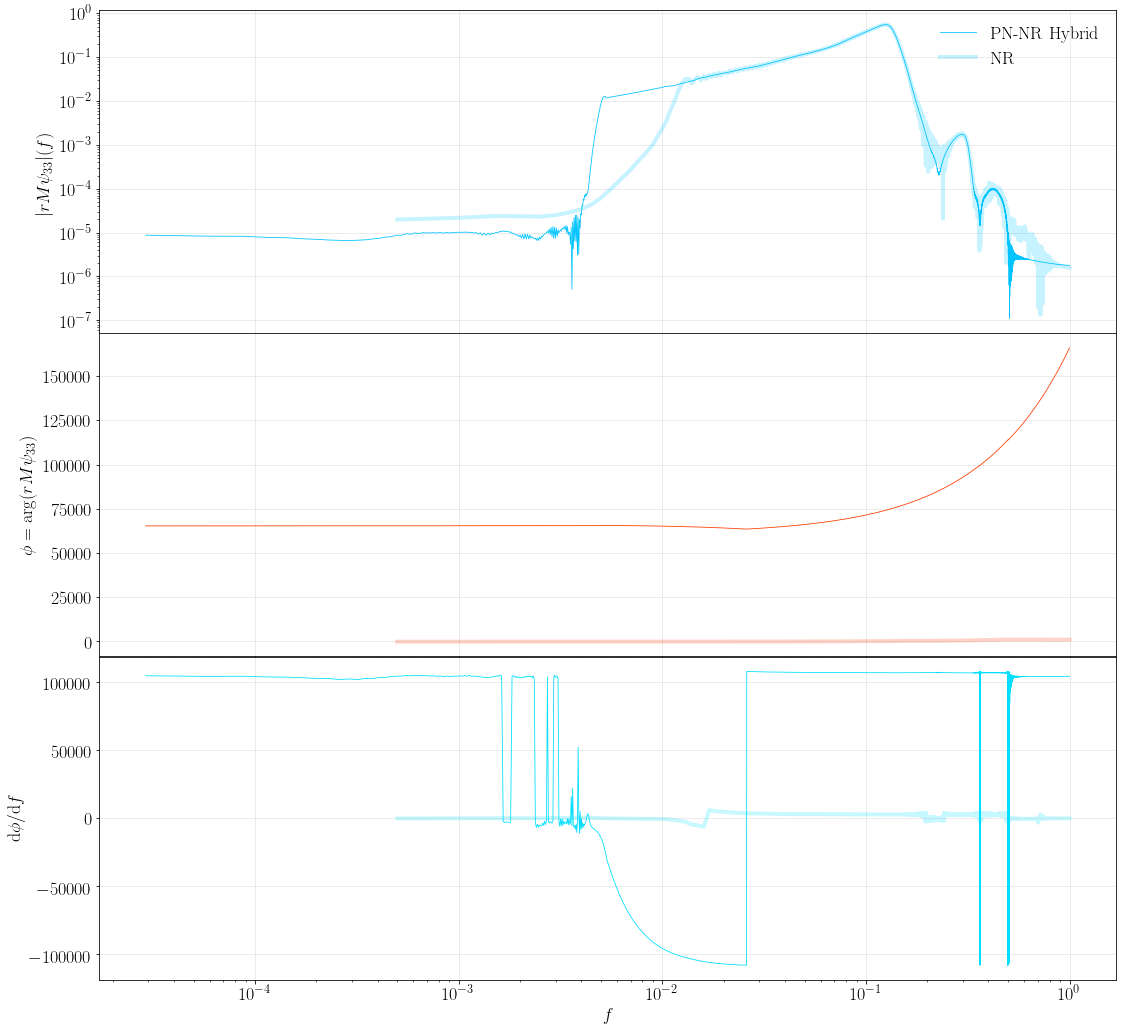


# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ #
(__calc_multipole_hybrids__)>> Creating hybrid for: (4, 4)
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ #

(__get_aligned_nr_pn_amp_phase__!)>> A scale factor of 0.909277 is applied to the PN amplitude.
(__get_aligned_nr_pn_amp_phase__!)>> The PN phase will be shifted by -0.201022 (rad).


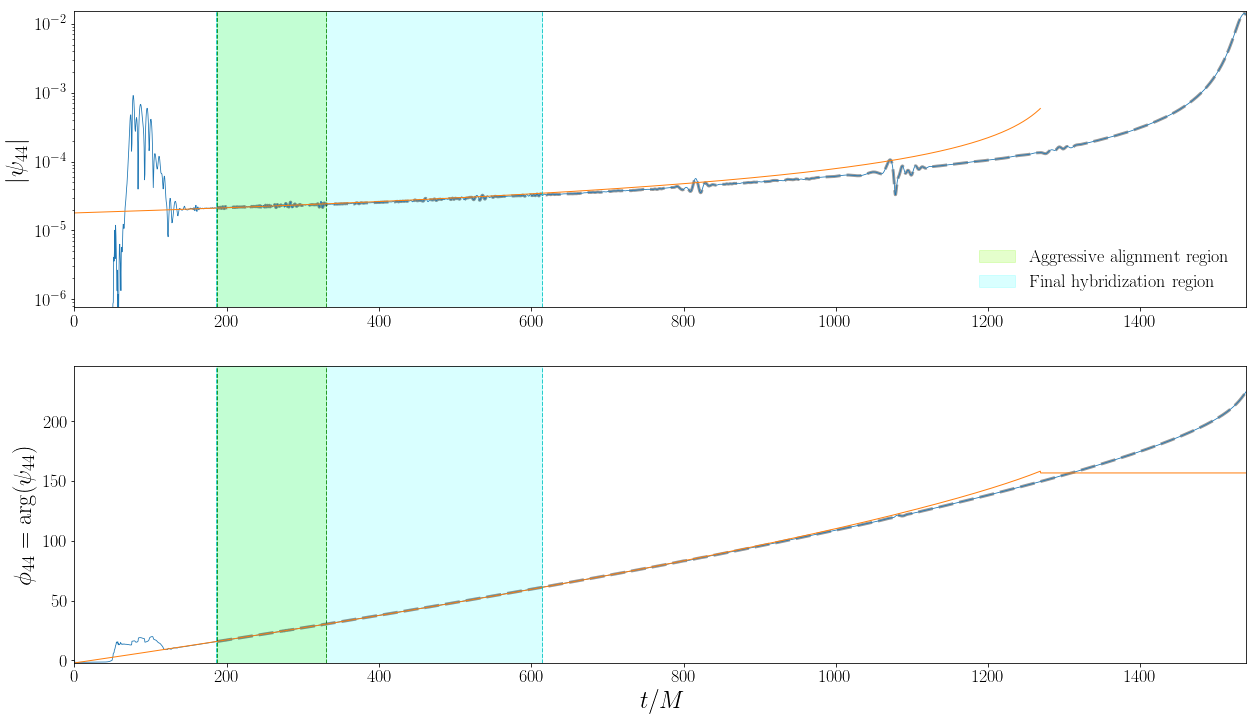

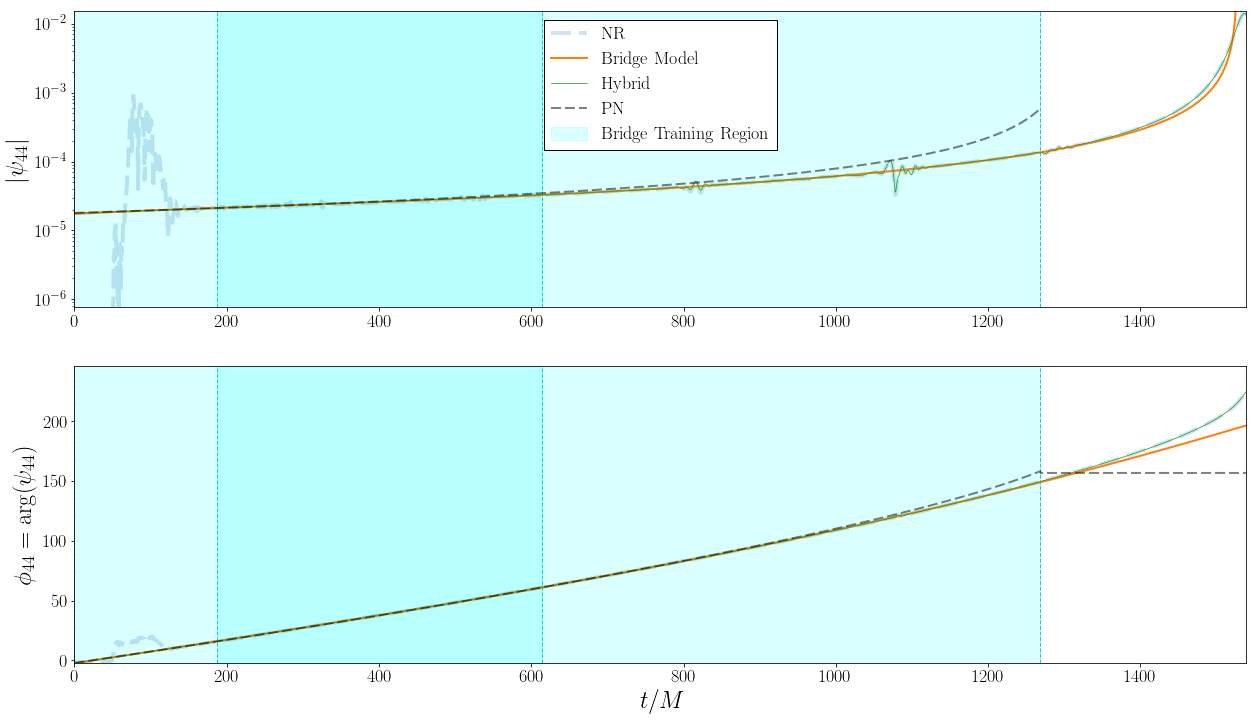

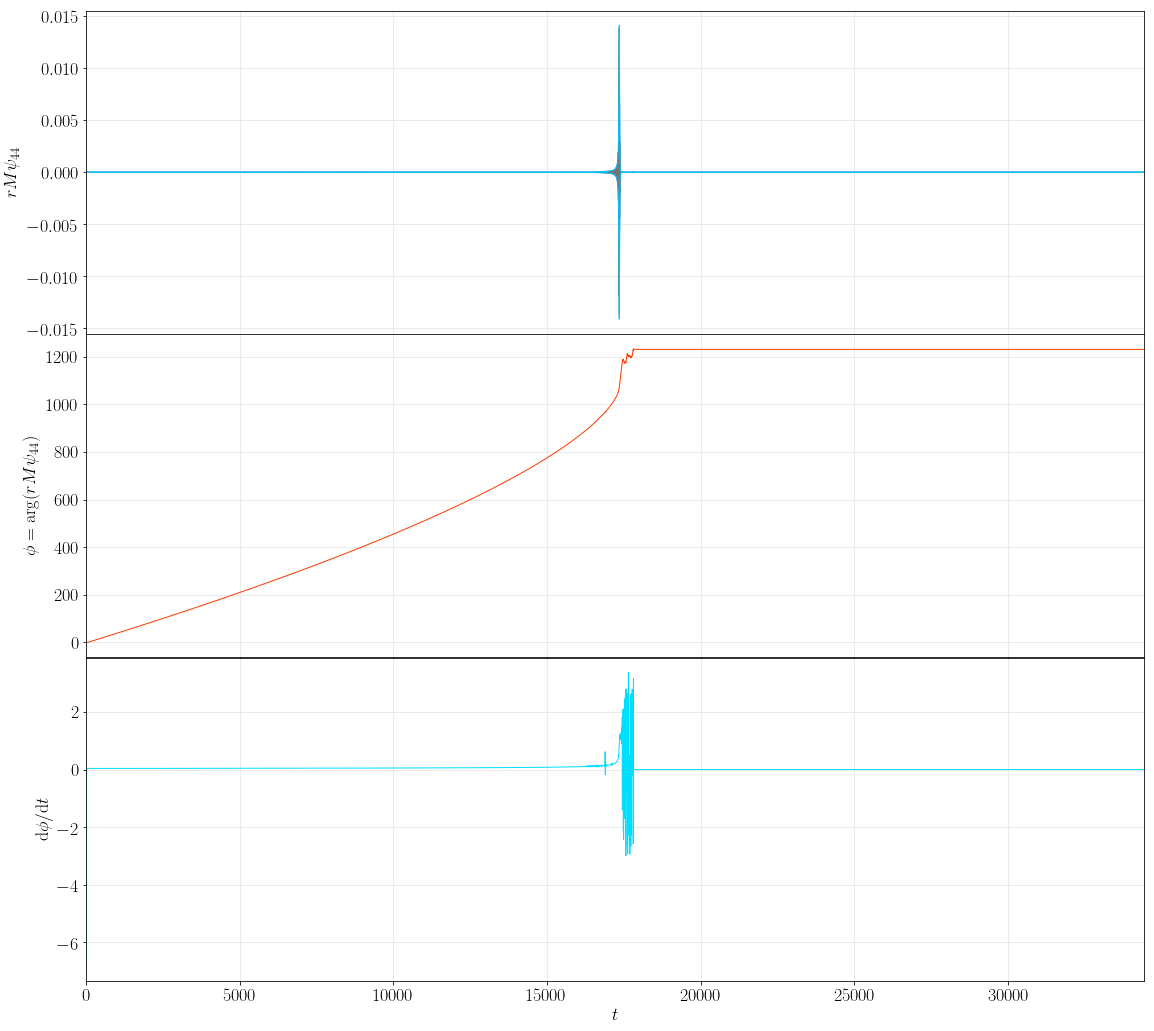

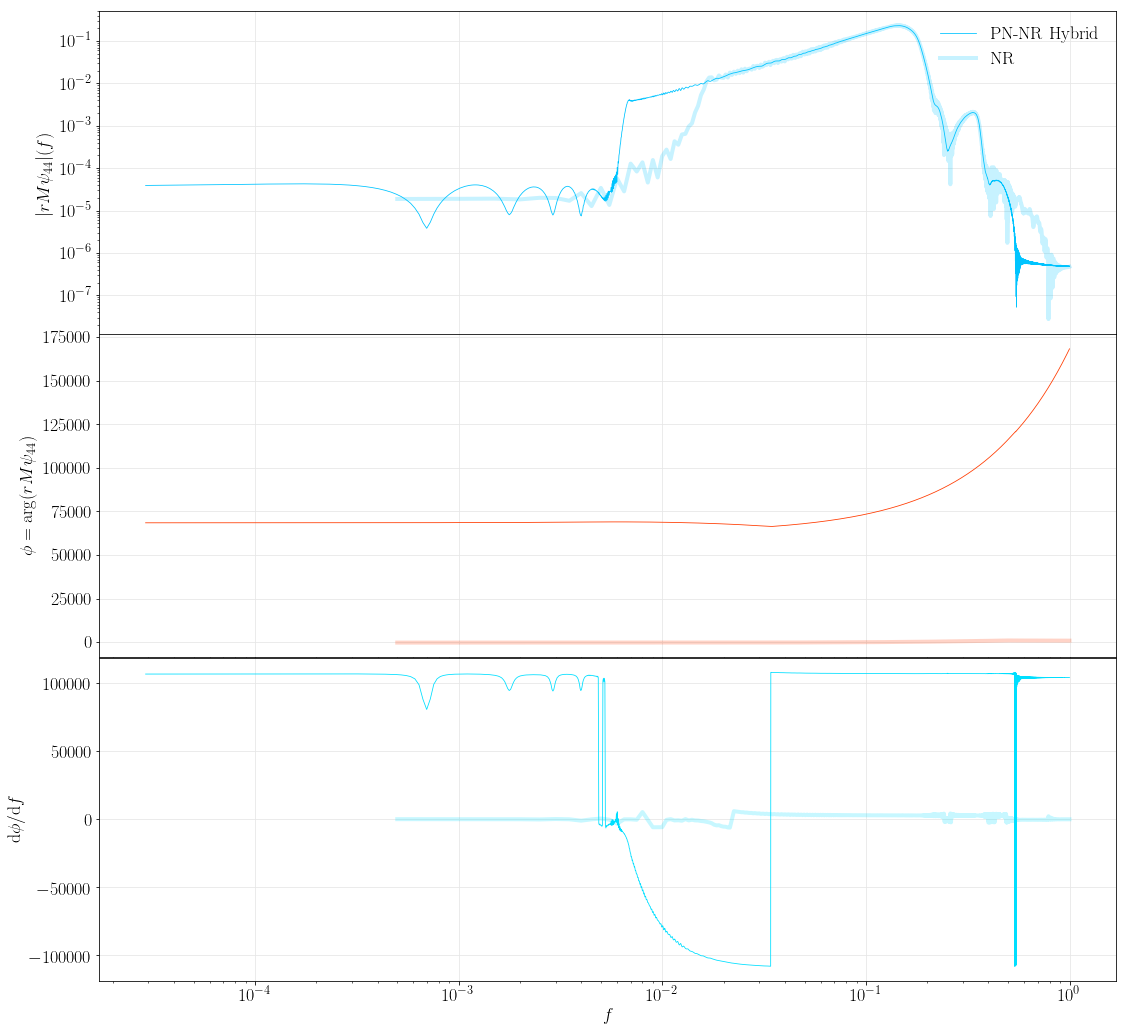

In [166]:
# -~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~ #
# Create instance of hybird workflow
# -~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~ #

#
y.__calc_radiated_quantities__()
# strain_w_orb_min = y.lm[2,2]['strain'].dphi[y.remnant['mask']][0]/2
w_orb_min = y.wstart_pn/2
w_orb_merger = y[2,2]['psi4'].dphi[ y[2,2]['psi4'].k_amp_max ]/2

# pnwmin = 0.75*w_orb_min
pnwmin = 0.01#0.75*w_orb_min
pnwmax = (w_orb_merger+4*w_orb_min)/5
# NOTE that if pnwmax is too large the xcorr guess for t0 will be wrong

# pnwmin = max(0.0025,0.5*strain_w_orb_min)
# pnwmax = 1.5*strain_w_orb_min

# Initiate class instance
this = make_pnnr_hybrid( y,                     # gwylm obj 
                         pn_w_orb_min=pnwmin,   # start of PN freq 
                         pn_w_orb_max=pnwmax,   #   end of PN freq 
                         kind = 'psi4',
                         plot = True,
                         aggressive=2,
                         verbose=True)